第一步：数据预处理与特征工程

In [4]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1. 加载数据
train_df = pd.read_csv("train.csv") # 包含 'Question', 'Response', 'target'
test_df = pd.read_csv("test.csv")

# ===================== 关键修改：处理空值 =====================
# 第一步：检查空值情况（方便排查问题）
print("处理前空值统计：")
print("train_df Question空值数:", train_df['Question'].isna().sum())
print("train_df Response空值数:", train_df['Response'].isna().sum())
print("test_df Question空值数:", test_df['Question'].isna().sum())
print("test_df Response空值数:", test_df['Response'].isna().sum())

# 第二步：填充空值（推荐方案，避免删除数据导致样本减少）
# 用空字符串填充NaN，后续再统一处理空文本
train_df['Question'] = train_df['Question'].fillna("")
train_df['Response'] = train_df['Response'].fillna("")
test_df['Question'] = test_df['Question'].fillna("")
test_df['Response'] = test_df['Response'].fillna("")

# 2. 文本清洗与合并
train_df['text'] = train_df['Question'] + " " + train_df['Response']
test_df['text'] = test_df['Question'] + " " + test_df['Response']

# 第三步：处理拼接后仍为空的文本（替换为占位符）
# 避免空字符串被TF-IDF判定为无效文档
train_df['text'] = train_df['text'].replace("", "no_text")
test_df['text'] = test_df['text'].replace("", "no_text")

# （可选方案：删除空文本行，适合样本量充足的情况）
# train_df = train_df[train_df['text'] != "no_text"].reset_index(drop=True)

# ===================== 恢复原有流程 =====================
# 3. 标签编码
le = LabelEncoder()
y = le.fit_transform(train_df['target'])

# 4. 特征提取
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1,2))
X = vectorizer.fit_transform(train_df['text']) # 现在不会报错

# 5. 划分验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\n训练集维度: {X_train.shape}")
print("空值处理完成，代码可正常运行！")

处理前空值统计：
train_df Question空值数: 0
train_df Response空值数: 7
test_df Question空值数: 0
test_df Response空值数: 2

训练集维度: (3180, 5000)
空值处理完成，代码可正常运行！



Distribution of Target Classes (Overall Dataset):
0    568
1    568
2    568
3    568
4    568
5    568
6    568
Name: count, dtype: int64


/tmp/ipython-input-2430710513.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=overall_counts.index, y=overall_counts.values, palette='viridis')


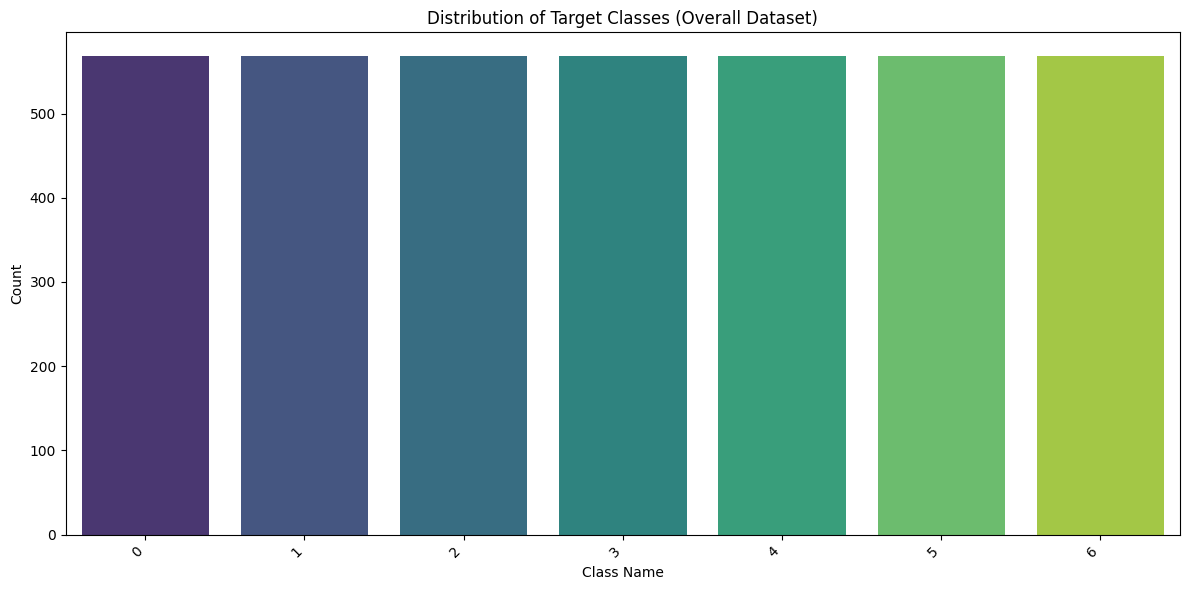


Distribution of Target Classes (Training Set):
0    465
1    455
2    440
3    448
4    460
5    455
6    457
Name: count, dtype: int64


/tmp/ipython-input-2430710513.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_counts.index, y=train_counts.values, palette='plasma')


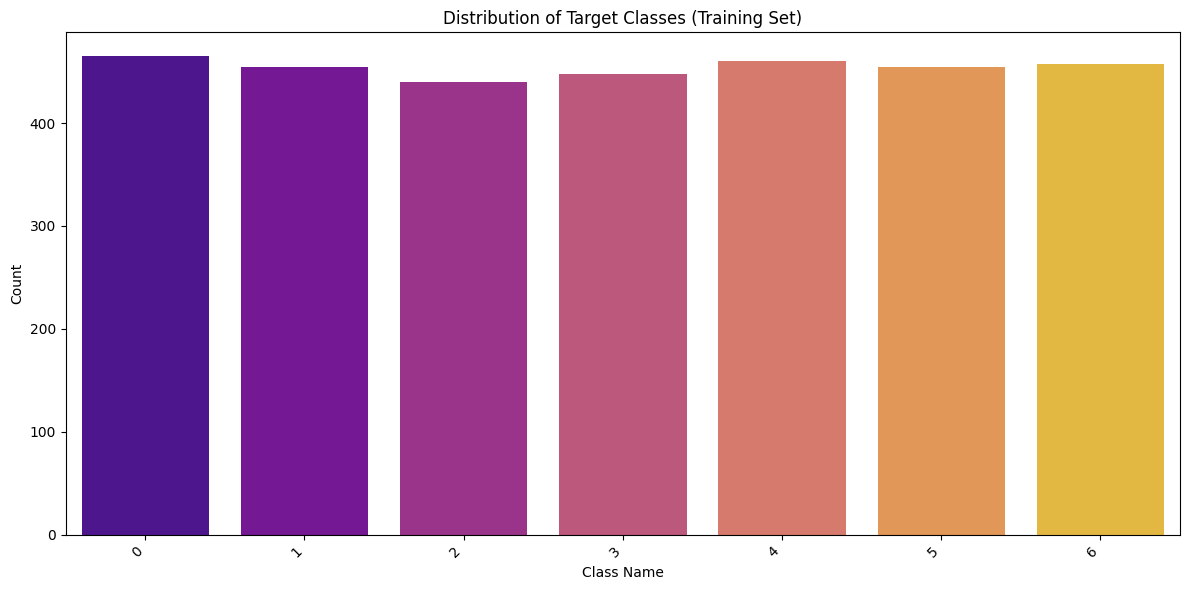

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get original class names from the LabelEncoder
class_names = le.inverse_transform(np.arange(len(le.classes_)))

# 3. Calculate and visualize the distribution of target classes in the overall dataset (y)
print("\nDistribution of Target Classes (Overall Dataset):")
y_df = pd.DataFrame(y, columns=['target'])
overall_counts = y_df['target'].value_counts().sort_index()
overall_counts.index = class_names[overall_counts.index]
print(overall_counts)

plt.figure(figsize=(12, 6))
sns.barplot(x=overall_counts.index, y=overall_counts.values, palette='viridis')
plt.title('Distribution of Target Classes (Overall Dataset)')
plt.xlabel('Class Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5. Calculate and visualize the distribution of target classes in the training set (y_train)
print("\nDistribution of Target Classes (Training Set):")
y_train_df = pd.DataFrame(y_train, columns=['target'])
train_counts = y_train_df['target'].value_counts().sort_index()
train_counts.index = class_names[train_counts.index]
print(train_counts)

plt.figure(figsize=(12, 6))
sns.barplot(x=train_counts.index, y=train_counts.values, palette='plasma')
plt.title('Distribution of Target Classes (Training Set)')
plt.xlabel('Class Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code generated a FutureWarning due to `palette` being passed without `hue`. To fix this, I will explicitly assign the `x` variable to `hue` and set `legend=False` in the `sns.barplot` calls as suggested by the warning.




Distribution of Target Classes (Overall Dataset):
0    568
1    568
2    568
3    568
4    568
5    568
6    568
Name: count, dtype: int64


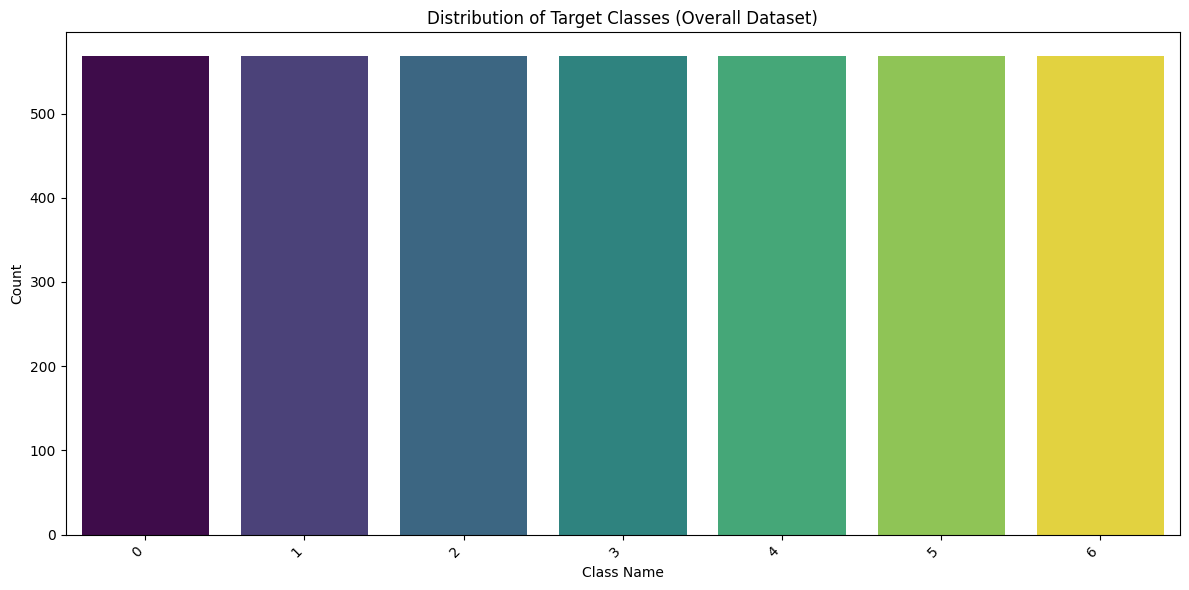


Distribution of Target Classes (Training Set):
0    465
1    455
2    440
3    448
4    460
5    455
6    457
Name: count, dtype: int64


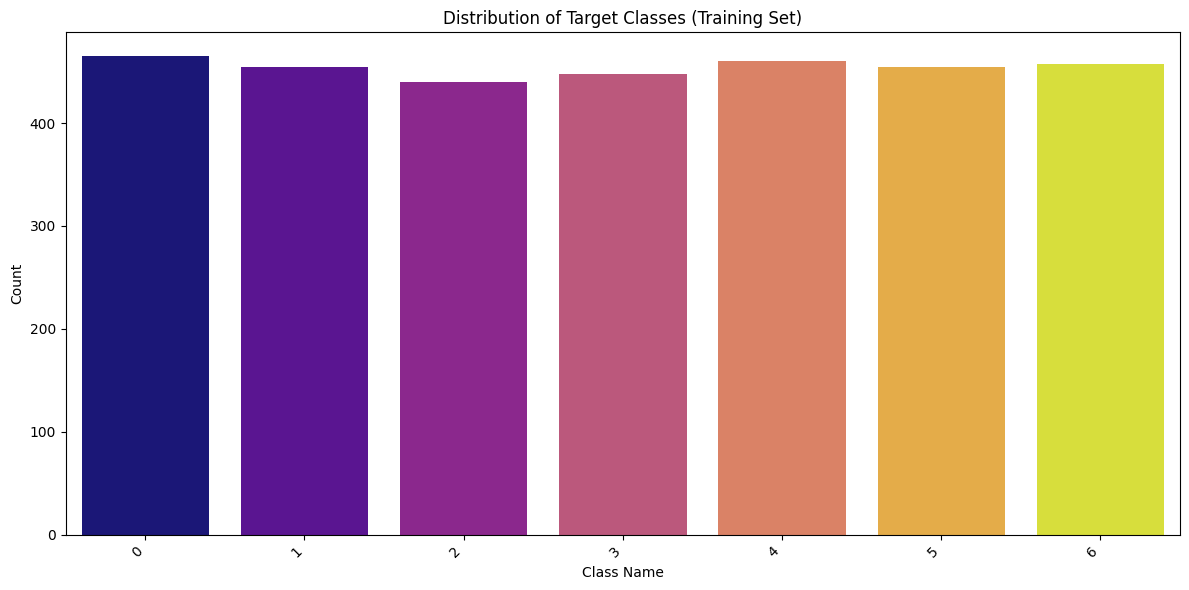

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get original class names from the LabelEncoder
class_names = le.inverse_transform(np.arange(len(le.classes_)))

# 3. Calculate and visualize the distribution of target classes in the overall dataset (y)
print("\nDistribution of Target Classes (Overall Dataset):")
y_df = pd.DataFrame(y, columns=['target'])
overall_counts = y_df['target'].value_counts().sort_index()
overall_counts.index = class_names[overall_counts.index]
print(overall_counts)

plt.figure(figsize=(12, 6))
sns.barplot(x=overall_counts.index, y=overall_counts.values, hue=overall_counts.index, palette='viridis', legend=False)
plt.title('Distribution of Target Classes (Overall Dataset)')
plt.xlabel('Class Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5. Calculate and visualize the distribution of target classes in the training set (y_train)
print("\nDistribution of Target Classes (Training Set):")
y_train_df = pd.DataFrame(y_train, columns=['target'])
train_counts = y_train_df['target'].value_counts().sort_index()
train_counts.index = class_names[train_counts.index]
print(train_counts)

plt.figure(figsize=(12, 6))
sns.barplot(x=train_counts.index, y=train_counts.values, hue=train_counts.index, palette='plasma', legend=False)
plt.title('Distribution of Target Classes (Training Set)')
plt.xlabel('Class Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Insights from Target Class Distribution:

1.  **Overall Dataset (`y`)**: The distribution of target classes in the overall dataset is perfectly balanced, with each of the 7 classes having exactly 568 samples. This indicates that the original dataset was either naturally balanced or intentionally preprocessed to ensure an equal representation of all classes.
2.  **Training Set (`y_train`)**: After the `train_test_split`, the training set maintains a relatively balanced distribution, although not perfectly equal like the overall dataset. The class counts range from 440 to 465. This slight imbalance in the training set is a natural outcome of random splitting and is generally acceptable for most classification tasks, especially when the original dataset was perfectly balanced. This suggests that the split preserved the overall class proportions reasonably well.

**Reasoning**:
Now that the target class distribution has been analyzed, the next step is to identify and visualize the top 20 most important TF-IDF features from `X_train` based on their aggregated TF-IDF scores, and extract feature names from the `TfidfVectorizer`.




Top 20 Most Important TF-IDF Features:
          feature  tfidf_sum
1153         data  60.580619
301        answer  41.166307
3533      process  35.704742
2308  information  35.249549
4585         time  33.858059
4883          war  32.594059
2628         like  31.902035
4966        world  30.071141
2515        known  29.128337
3611      provide  28.919025
4782          use  28.515445
3055          new  27.896993
3663     question  27.862296
2579     learning  27.819666
1318    different  25.759945
4477     symptoms  25.546830
685         cause  25.513262
2238    important  25.239651
2099         help  25.128009
3223         pain  24.846054


/tmp/ipython-input-21399396.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tfidf_sum', y='feature', data=top_20_features, palette='rocket')


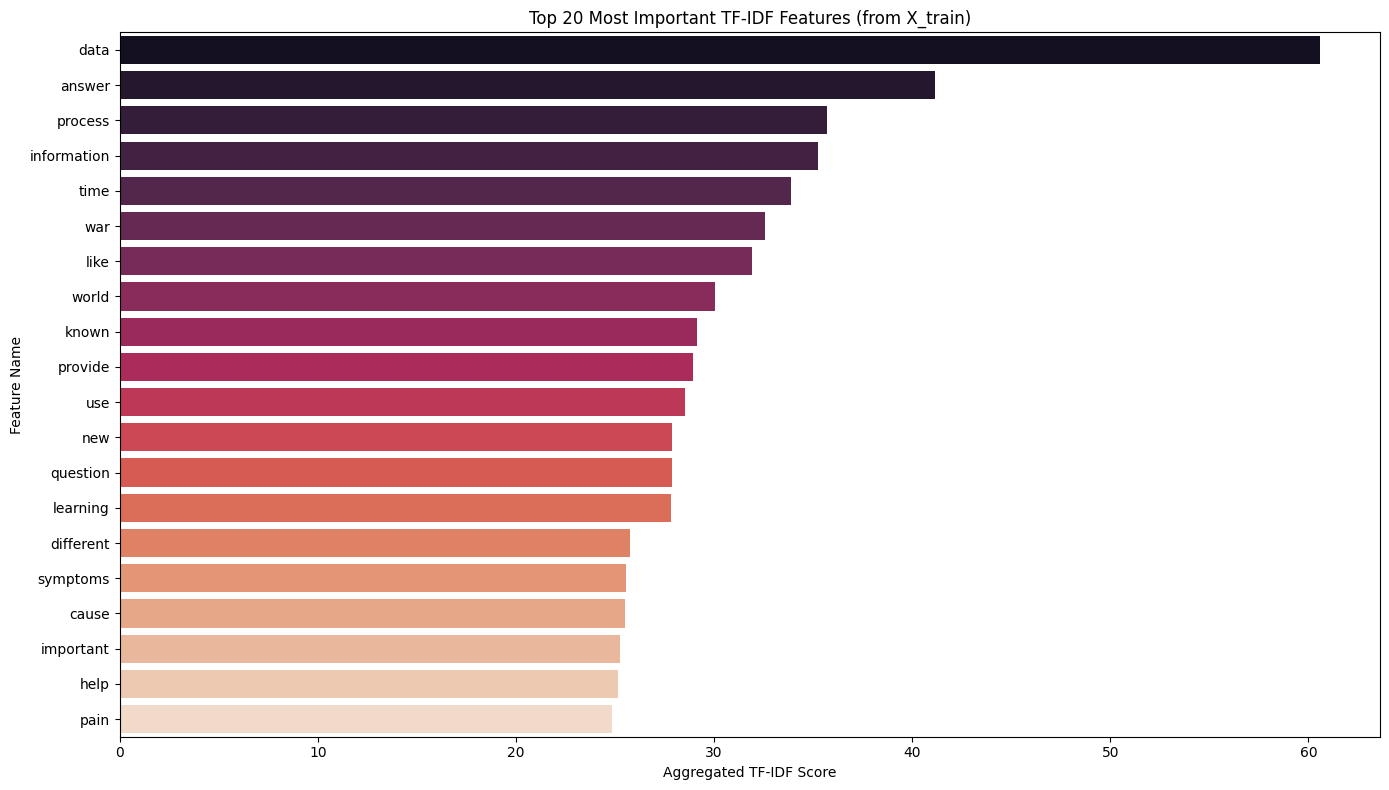

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 6. Identify and visualize the top 20 most important TF-IDF features

# Get feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Calculate the sum of TF-IDF scores for each feature across all documents in X_train
# X_train is a sparse matrix, sum(axis=0) will sum across documents for each feature
tfidf_sums = X_train.sum(axis=0).A1 # .A1 converts a sparse matrix to a 1D numpy array

# Create a DataFrame for easier sorting and selection
feature_scores = pd.DataFrame({'feature': feature_names, 'tfidf_sum': tfidf_sums})

# Sort by tfidf_sum in descending order and get the top 20
top_20_features = feature_scores.sort_values(by='tfidf_sum', ascending=False).head(20)

print("\nTop 20 Most Important TF-IDF Features:")
print(top_20_features)

# Visualize the top 20 features
plt.figure(figsize=(14, 8))
sns.barplot(x='tfidf_sum', y='feature', data=top_20_features, palette='rocket')
plt.title('Top 20 Most Important TF-IDF Features (from X_train)')
plt.xlabel('Aggregated TF-IDF Score')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code generated a FutureWarning due to `palette` being passed without `hue`. To fix this, I will explicitly assign the `y` variable (`feature`) to `hue` and set `legend=False` in the `sns.barplot` call, as suggested by the warning.




Top 20 Most Important TF-IDF Features:
          feature  tfidf_sum
1153         data  60.580619
301        answer  41.166307
3533      process  35.704742
2308  information  35.249549
4585         time  33.858059
4883          war  32.594059
2628         like  31.902035
4966        world  30.071141
2515        known  29.128337
3611      provide  28.919025
4782          use  28.515445
3055          new  27.896993
3663     question  27.862296
2579     learning  27.819666
1318    different  25.759945
4477     symptoms  25.546830
685         cause  25.513262
2238    important  25.239651
2099         help  25.128009
3223         pain  24.846054


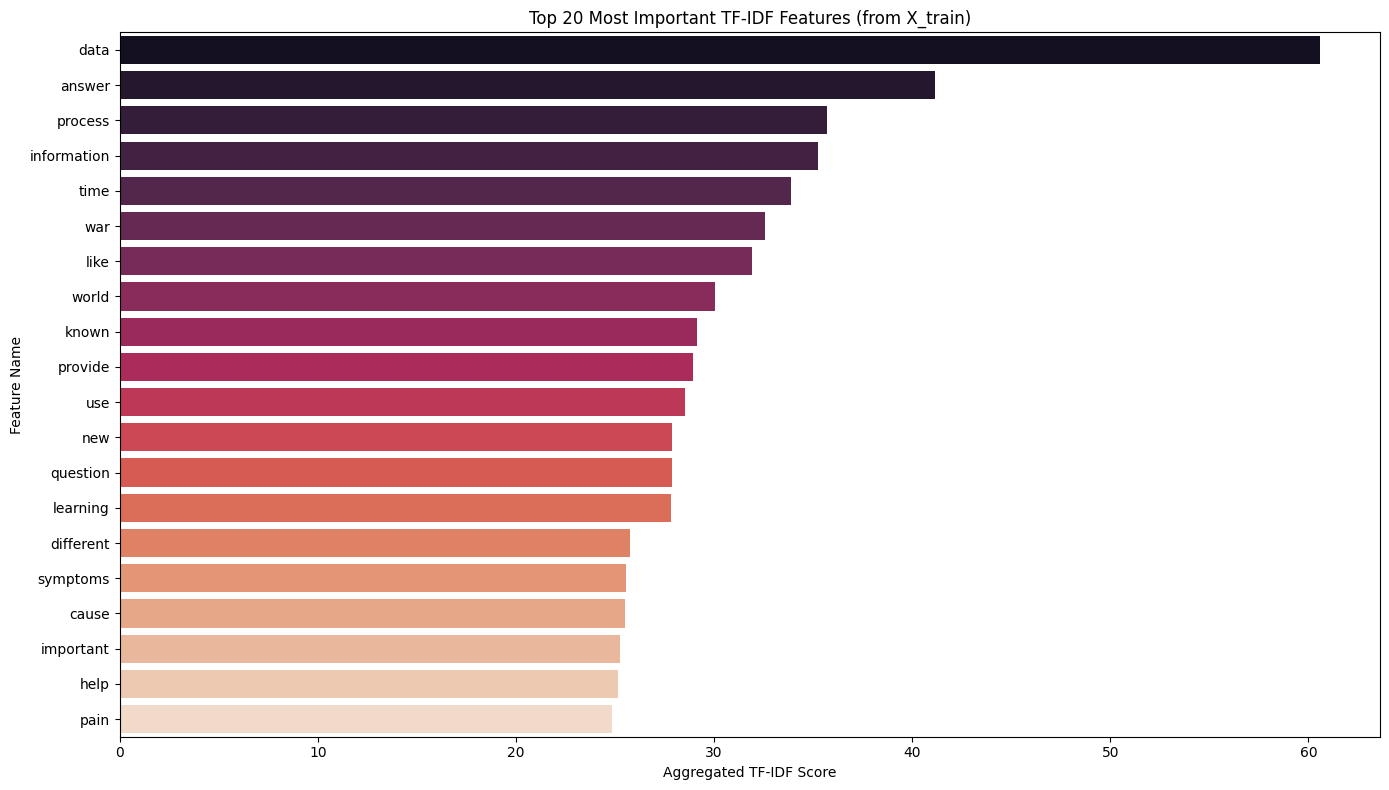

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 6. Identify and visualize the top 20 most important TF-IDF features

# Get feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Calculate the sum of TF-IDF scores for each feature across all documents in X_train
# X_train is a sparse matrix, sum(axis=0) will sum across documents for each feature
tfidf_sums = X_train.sum(axis=0).A1 # .A1 converts a sparse matrix to a 1D numpy array

# Create a DataFrame for easier sorting and selection
feature_scores = pd.DataFrame({'feature': feature_names, 'tfidf_sum': tfidf_sums})

# Sort by tfidf_sum in descending order and get the top 20
top_20_features = feature_scores.sort_values(by='tfidf_sum', ascending=False).head(20)

print("\nTop 20 Most Important TF-IDF Features:")
print(top_20_features)

# Visualize the top 20 features
plt.figure(figsize=(14, 8))
sns.barplot(x='tfidf_sum', y='feature', data=top_20_features, hue='feature', palette='rocket', legend=False)
plt.title('Top 20 Most Important TF-IDF Features (from X_train)')
plt.xlabel('Aggregated TF-IDF Score')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

### Insights from Top 20 TF-IDF Features:

1.  **Dominant Features**: The word 'data' has a significantly higher aggregated TF-IDF score (over 60) compared to other features, indicating its high relevance and distinctiveness across the documents in the training set. This suggests that a substantial portion of the questions and responses likely revolve around topics involving 'data'.
2.  **Question-Answering Context**: Words like 'answer', 'question', 'information', 'process', 'provide', 'use', and 'help' appear in the top 20. This is expected as the dataset likely consists of question-answer pairs, and these terms are highly indicative of such conversational or informational retrieval contexts.
3.  **General Knowledge & Science Terms**: Features such as 'world', 'new', 'known', 'different', 'learning', and specific terms like 'symptoms', 'cause', and 'pain' (which might relate to medical or health-related questions) or 'war' suggest that the dataset covers a broad range of general knowledge, science, and potentially health-related topics.
4.  **Feature Importance**: The visualization clearly shows that while 'data' is the most important, there's a gradual decrease in aggregated TF-IDF scores among the top features, implying that many words contribute to the overall textual information, but a few stand out significantly.

### Overall Summary:

Both the target class distribution and the TF-IDF feature analysis provide valuable insights into the dataset. The dataset is well-balanced in terms of target classes, ensuring fair model training. The key TF-IDF features highlight the common themes and essential terms present in the 'Question' and 'Response' text, confirming the nature of the dataset as a collection of informational or query-response content. These insights will be crucial for further model development and interpretation.

为了高效地完成这三种 HPO 方法的对比，我建议采用以下技术路线：

特征工程：使用预训练模型生成的 Embeddings（如 sentence-transformers）或 TF-IDF 作为输入特征。

基模型：使用 LightGBM 或 XGBoost。它们训练速度快，且超参数对性能影响显著，非常适合用来展示 HPO 的效果。

HPO 工具：主要使用 Optuna（因为它支持 TPE 和 随机搜索）以及 Sklearn（用于网格搜索）。

以下是一个结构化的解决方案框架，包含了代码实现和分析思路：

第一步：数据预处理与特征工程
在进入 AutoML 循环之前，我们需要将文本转换为模型可读的数值向量。（上面的步骤）
第二步：实施三种 HPO 方法
我们将优化 LightGBM 模型的关键超参数：learning_rate, num_leaves, max_depth, lambda_l1, lambda_l2。

方法 1：网格搜索 (Grid Search) - 基准线
网格搜索是穷举法，它是最基础但也最耗时的。我们将使用 sklearn。

In [12]:
!pip install tqdm_joblib

In [13]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
import time
import multiprocessing
from tqdm_joblib import tqdm_joblib # Import tqdm_joblib

# 定义参数网格 (为了运行时间考虑，网格不能太大)
param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 300],
    'num_leaves': [31, 63],
    'max_depth': [-1, 10]
}

lgbm = LGBMClassifier(random_state=42, verbose=-1)

start_time = time.time()

# Initialize GridSearchCV, setting verbose=0 to prevent conflicting output with tqdm
grid_search = GridSearchCV(
    lgbm,
    param_grid,
    cv=3,
    scoring='neg_log_loss',
    n_jobs=multiprocessing.cpu_count(),  # Use all available CPU cores
    verbose=0
)

# Wrap the fit method with tqdm_joblib context manager for a progress bar
with tqdm_joblib(desc="Grid Search Progress"):
    grid_search.fit(X_train, y_train)

end_time = time.time()

# 输出结果
print(f"\nGrid Search Best Score: {-grid_search.best_score_:.4f}")
print(f"Grid Search Best Params: {grid_search.best_params_}")
print(f"Grid Search Total Time: {end_time - start_time:.2f}s")

/usr/local/lib/python3.12/dist-packages/tqdm_joblib/__init__.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


Grid Search Progress: 0it [00:00, ?it/s]


Grid Search Best Score: 1.7127
Grid Search Best Params: {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 300, 'num_leaves': 63}
Grid Search Total Time: 608.00s


In [ ]:
方法 2：随机搜索 (Random Search) - 基于 Optuna
随机搜索在很多情况下比网格搜索更有效，因为它能探索更广泛的空间。我们将使用 Optuna 的 RandomSampler。

In [17]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 8.6 MB/s eta 0:00:00


In [20]:
import optuna
from optuna.samplers import RandomSampler
import sklearn.metrics
import time

def objective(trial):
    params = {
        'objective': 'multiclass',
        'metric': 'multi_logloss',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'random_state': 42,
        # 搜索空间
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'num_leaves': trial.suggest_int('num_leaves', 20, 300),
        'max_depth': trial.suggest_int('max_depth', 5, 20),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0, log=True),
    }


    model = LGBMClassifier(**params)
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], callbacks=[])

    preds = model.predict_proba(X_val)
    loss = sklearn.metrics.log_loss(y_val, preds)
    return loss

start_time = time.time()
# 创建 Study，指定采样器为随机搜索
sampler = RandomSampler(seed=42)
study_random = optuna.create_study(direction='minimize', sampler=sampler, study_name="Random_Search")

# 尝试30次，并显示进度条
study_random.optimize(objective, n_trials=30, show_progress_bar=True)

end_time = time.time()

print(f"\nRandom Search Best Loss: {study_random.best_value:.4f}")
print(f"Random Search Total Time: {end_time - start_time:.2f}s")

[I 2025-12-04 08:03:48,538] A new study created in memory with name: Random_Search


  0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 08:05:28,964] Trial 0 finished with value: 2.2176781537037376 and parameters: {'learning_rate': 0.03574712922600244, 'n_estimators': 956, 'num_leaves': 225, 'max_depth': 14, 'reg_alpha': 2.5361081166471375e-07, 'reg_lambda': 2.5348407664333426e-07}. Best is trial 0 with value: 2.2176781537037376.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 08:07:18,676] Trial 1 finished with value: 1.6890181166659222 and parameters: {'learning_rate': 0.012184186502221764, 'n_estimators': 880, 'num_leaves': 188, 'max_depth': 16, 'reg_alpha': 1.5320059381854043e-08, 'reg_lambda': 5.360294728728285}. Best is trial 1 with value: 1.6890181166659222.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 08:07:35,461] Trial 2 finished with value: 2.066851886591905 and parameters: {'learning_rate': 0.16967533607196555, 'n_estimators': 291, 'num_leaves': 71, 'max_depth': 7, 'reg_alpha': 5.472429642032198e-06, 'reg_lambda': 0.00052821153945323}. Best is trial 1 with value: 1.6890181166659222.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 08:07:56,153] Trial 3 finished with value: 1.7098835402062582 and parameters: {'learning_rate': 0.04345454109729477, 'n_estimators': 362, 'num_leaves': 191, 'max_depth': 7, 'reg_alpha': 4.258943089524393e-06, 'reg_lambda': 1.9826980964985924e-05}. Best is trial 1 with value: 1.6890181166659222.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 08:09:12,474] Trial 4 finished with value: 2.2474818812638717 and parameters: {'learning_rate': 0.04717052037625178, 'n_estimators': 807, 'num_leaves': 76, 'max_depth': 13, 'reg_alpha': 0.0021465011216654484, 'reg_lambda': 2.6185068507773707e-08}. Best is trial 1 with value: 1.6890181166659222.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 08:09:22,209] Trial 5 finished with value: 1.6406340498383964 and parameters: {'learning_rate': 0.07896186801026692, 'n_estimators': 253, 'num_leaves': 38, 'max_depth': 20, 'reg_alpha': 4.905556676028774, 'reg_lambda': 0.18861495878553936}. Best is trial 5 with value: 1.6406340498383964.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 08:09:41,479] Trial 6 finished with value: 1.6694521474483306 and parameters: {'learning_rate': 0.028180680291847244, 'n_estimators': 188, 'num_leaves': 212, 'max_depth': 12, 'reg_alpha': 1.254134495897175e-07, 'reg_lambda': 0.00028614897264046574}. Best is trial 5 with value: 1.6406340498383964.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 08:11:28,481] Trial 7 finished with value: 1.7622141993261937 and parameters: {'learning_rate': 0.011240768803005551, 'n_estimators': 919, 'num_leaves': 92, 'max_depth': 15, 'reg_alpha': 6.388511557344611e-06, 'reg_lambda': 0.0004793052550782129}. Best is trial 5 with value: 1.6406340498383964.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 08:11:45,036] Trial 8 finished with value: 1.6764601714610745 and parameters: {'learning_rate': 0.06420330336297862, 'n_estimators': 266, 'num_leaves': 292, 'max_depth': 17, 'reg_alpha': 2.854239907497756, 'reg_lambda': 1.1309571585271483}. Best is trial 5 with value: 1.6406340498383964.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 08:12:37,784] Trial 9 finished with value: 2.3574080854927266 and parameters: {'learning_rate': 0.0764136186923332, 'n_estimators': 930, 'num_leaves': 44, 'max_depth': 8, 'reg_alpha': 2.5529693461039728e-08, 'reg_lambda': 8.471746987003668e-06}. Best is trial 5 with value: 1.6406340498383964.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 08:13:06,663] Trial 10 finished with value: 1.730715509310182 and parameters: {'learning_rate': 0.03750796359625606, 'n_estimators': 344, 'num_leaves': 252, 'max_depth': 10, 'reg_alpha': 3.376063348877853e-06, 'reg_lambda': 0.0007660634613082914}. Best is trial 5 with value: 1.6406340498383964.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 08:15:09,692] Trial 11 finished with value: 1.8783112240034425 and parameters: {'learning_rate': 0.016149614799999188, 'n_estimators': 822, 'num_leaves': 40, 'max_depth': 20, 'reg_alpha': 0.08916674715636537, 'reg_lambda': 6.143857495033091e-07}. Best is trial 5 with value: 1.6406340498383964.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 08:16:59,084] Trial 12 finished with value: 1.7293406115076566 and parameters: {'learning_rate': 0.010189592979395137, 'n_estimators': 834, 'num_leaves': 218, 'max_depth': 16, 'reg_alpha': 0.08738424135626986, 'reg_lambda': 4.638759594322625e-08}. Best is trial 5 with value: 1.6406340498383964.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 08:17:23,138] Trial 13 finished with value: 1.6940932080612323 and parameters: {'learning_rate': 0.0338452204120114, 'n_estimators': 204, 'num_leaves': 262, 'max_depth': 14, 'reg_alpha': 9.507847858536042e-06, 'reg_lambda': 3.732717755563729e-08}. Best is trial 5 with value: 1.6406340498383964.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 08:18:04,839] Trial 14 finished with value: 1.725325719314967 and parameters: {'learning_rate': 0.028797752657070342, 'n_estimators': 392, 'num_leaves': 225, 'max_depth': 15, 'reg_alpha': 0.9658611176861268, 'reg_lambda': 0.0001778010520878397}. Best is trial 5 with value: 1.6406340498383964.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 08:19:25,274] Trial 15 finished with value: 1.7444570200131722 and parameters: {'learning_rate': 0.015019490572374374, 'n_estimators': 742, 'num_leaves': 233, 'max_depth': 13, 'reg_alpha': 0.08683696167603723, 'reg_lambda': 0.0002780739892288472}. Best is trial 5 with value: 1.6406340498383964.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 08:19:49,111] Trial 16 finished with value: 1.788678859229461 and parameters: {'learning_rate': 0.05917520523090666, 'n_estimators': 485, 'num_leaves': 27, 'max_depth': 6, 'reg_alpha': 1.9180621318615033e-08, 'reg_lambda': 0.005341874754868531}. Best is trial 5 with value: 1.6406340498383964.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 08:20:27,254] Trial 17 finished with value: 1.728426328347459 and parameters: {'learning_rate': 0.029130095015495922, 'n_estimators': 558, 'num_leaves': 275, 'max_depth': 8, 'reg_alpha': 4.9368087974032924e-05, 'reg_lambda': 0.06308995924905789}. Best is trial 5 with value: 1.6406340498383964.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 08:20:37,864] Trial 18 finished with value: 1.6478202945510818 and parameters: {'learning_rate': 0.021775224101934068, 'n_estimators': 169, 'num_leaves': 101, 'max_depth': 7, 'reg_alpha': 2.3295866619309256, 'reg_lambda': 0.18753546777666233}. Best is trial 5 with value: 1.6406340498383964.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 08:21:09,382] Trial 19 finished with value: 1.8986422114158177 and parameters: {'learning_rate': 0.08622121759478739, 'n_estimators': 885, 'num_leaves': 245, 'max_depth': 7, 'reg_alpha': 1.0790237065789294, 'reg_lambda': 0.000714628244934021}. Best is trial 5 with value: 1.6406340498383964.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 08:21:47,287] Trial 20 finished with value: 2.7898840393950115 and parameters: {'learning_rate': 0.1558428978238547, 'n_estimators': 907, 'num_leaves': 109, 'max_depth': 6, 'reg_alpha': 1.1256839212661599e-06, 'reg_lambda': 6.98184330520185e-05}. Best is trial 5 with value: 1.6406340498383964.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 08:22:38,670] Trial 21 finished with value: 3.553174585114281 and parameters: {'learning_rate': 0.16155001304356414, 'n_estimators': 875, 'num_leaves': 21, 'max_depth': 13, 'reg_alpha': 5.710827318268536e-05, 'reg_lambda': 9.97631823424101e-07}. Best is trial 5 with value: 1.6406340498383964.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 08:23:14,003] Trial 22 finished with value: 1.6608338380174563 and parameters: {'learning_rate': 0.015033346993841165, 'n_estimators': 404, 'num_leaves': 284, 'max_depth': 10, 'reg_alpha': 0.0004667836070663388, 'reg_lambda': 0.02124078827890451}. Best is trial 5 with value: 1.6406340498383964.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 08:24:23,041] Trial 23 finished with value: 1.963668591203652 and parameters: {'learning_rate': 0.03444490684211451, 'n_estimators': 975, 'num_leaves': 290, 'max_depth': 9, 'reg_alpha': 0.00029870091504560114, 'reg_lambda': 5.103930927389519e-06}. Best is trial 5 with value: 1.6406340498383964.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 08:24:38,988] Trial 24 finished with value: 1.6588350975630448 and parameters: {'learning_rate': 0.02634777514406047, 'n_estimators': 133, 'num_leaves': 191, 'max_depth': 13, 'reg_alpha': 2.906088000706637e-08, 'reg_lambda': 3.21972053981427e-06}. Best is trial 5 with value: 1.6406340498383964.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 08:24:43,937] Trial 25 finished with value: 1.6297811216223397 and parameters: {'learning_rate': 0.21959317857485672, 'n_estimators': 315, 'num_leaves': 60, 'max_depth': 12, 'reg_alpha': 7.427695424061678, 'reg_lambda': 1.5083337319786327e-06}. Best is trial 25 with value: 1.6297811216223397.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 08:26:01,491] Trial 26 finished with value: 3.2778113985748503 and parameters: {'learning_rate': 0.09836162684900028, 'n_estimators': 786, 'num_leaves': 86, 'max_depth': 16, 'reg_alpha': 2.0419645327312315e-05, 'reg_lambda': 0.00490628164601872}. Best is trial 25 with value: 1.6297811216223397.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 08:27:05,418] Trial 27 finished with value: 2.91273395879484 and parameters: {'learning_rate': 0.0862581622692092, 'n_estimators': 582, 'num_leaves': 45, 'max_depth': 18, 'reg_alpha': 7.709400093120135e-06, 'reg_lambda': 4.771628167351996e-07}. Best is trial 25 with value: 1.6297811216223397.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 08:27:34,393] Trial 28 finished with value: 1.650649606597366 and parameters: {'learning_rate': 0.011487613841748902, 'n_estimators': 632, 'num_leaves': 210, 'max_depth': 5, 'reg_alpha': 0.0004062913017826356, 'reg_lambda': 1.0926019638459743e-06}. Best is trial 25 with value: 1.6297811216223397.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 08:27:47,292] Trial 29 finished with value: 1.6828867381456492 and parameters: {'learning_rate': 0.08974255743856958, 'n_estimators': 257, 'num_leaves': 214, 'max_depth': 11, 'reg_alpha': 2.6950690621944617, 'reg_lambda': 1.7285760734977495e-07}. Best is trial 25 with value: 1.6297811216223397.

Random Search Best Loss: 1.6298
Random Search Total Time: 1438.76s


方法 3：TPE (Tree-structured Parzen Estimator) - 贝叶斯优化
这是 Optuna 的默认且最强大的方法。它利用历史试验结果来构建概率模型，智能地选择下一组参数。

In [25]:
from optuna.samplers import TPESampler

# 创建 Study，指定采样器为 TPE (默认就是 TPE，但为了显式对比写出来)
start_time = time.time()
sampler_tpe = TPESampler(seed=42)
study_tpe = optuna.create_study(direction='minimize', sampler=sampler_tpe, study_name="TPE_Bayesian")
study_tpe.optimize(objective, n_trials=125,show_progress_bar=True) # 同样的试验次数，对比效果
end_time = time.time()
print(f"TPE Best Loss: {study_tpe.best_value}")

[I 2025-12-04 08:58:59,475] A new study created in memory with name: TPE_Bayesian


  0%|          | 0/125 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:00:44,326] Trial 0 finished with value: 2.2176781537037376 and parameters: {'learning_rate': 0.03574712922600244, 'n_estimators': 956, 'num_leaves': 225, 'max_depth': 14, 'reg_alpha': 2.5361081166471375e-07, 'reg_lambda': 2.5348407664333426e-07}. Best is trial 0 with value: 2.2176781537037376.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:02:31,607] Trial 1 finished with value: 1.6890181166659222 and parameters: {'learning_rate': 0.012184186502221764, 'n_estimators': 880, 'num_leaves': 188, 'max_depth': 16, 'reg_alpha': 1.5320059381854043e-08, 'reg_lambda': 5.360294728728285}. Best is trial 1 with value: 1.6890181166659222.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:02:47,332] Trial 2 finished with value: 2.066851886591905 and parameters: {'learning_rate': 0.16967533607196555, 'n_estimators': 291, 'num_leaves': 71, 'max_depth': 7, 'reg_alpha': 5.472429642032198e-06, 'reg_lambda': 0.00052821153945323}. Best is trial 1 with value: 1.6890181166659222.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:03:10,183] Trial 3 finished with value: 1.7098835402062582 and parameters: {'learning_rate': 0.04345454109729477, 'n_estimators': 362, 'num_leaves': 191, 'max_depth': 7, 'reg_alpha': 4.258943089524393e-06, 'reg_lambda': 1.9826980964985924e-05}. Best is trial 1 with value: 1.6890181166659222.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:04:26,444] Trial 4 finished with value: 2.2474818812638717 and parameters: {'learning_rate': 0.04717052037625178, 'n_estimators': 807, 'num_leaves': 76, 'max_depth': 13, 'reg_alpha': 0.0021465011216654484, 'reg_lambda': 2.6185068507773707e-08}. Best is trial 1 with value: 1.6890181166659222.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:04:35,246] Trial 5 finished with value: 1.6406340498383964 and parameters: {'learning_rate': 0.07896186801026692, 'n_estimators': 253, 'num_leaves': 38, 'max_depth': 20, 'reg_alpha': 4.905556676028774, 'reg_lambda': 0.18861495878553936}. Best is trial 5 with value: 1.6406340498383964.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:04:56,613] Trial 6 finished with value: 1.6694521474483306 and parameters: {'learning_rate': 0.028180680291847244, 'n_estimators': 188, 'num_leaves': 212, 'max_depth': 12, 'reg_alpha': 1.254134495897175e-07, 'reg_lambda': 0.00028614897264046574}. Best is trial 5 with value: 1.6406340498383964.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:06:48,196] Trial 7 finished with value: 1.7622141993261937 and parameters: {'learning_rate': 0.011240768803005551, 'n_estimators': 919, 'num_leaves': 92, 'max_depth': 15, 'reg_alpha': 6.388511557344611e-06, 'reg_lambda': 0.0004793052550782129}. Best is trial 5 with value: 1.6406340498383964.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:07:05,983] Trial 8 finished with value: 1.6764601714610745 and parameters: {'learning_rate': 0.06420330336297862, 'n_estimators': 266, 'num_leaves': 292, 'max_depth': 17, 'reg_alpha': 2.854239907497756, 'reg_lambda': 1.1309571585271483}. Best is trial 5 with value: 1.6406340498383964.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:08:00,617] Trial 9 finished with value: 2.3574080854927266 and parameters: {'learning_rate': 0.0764136186923332, 'n_estimators': 930, 'num_leaves': 44, 'max_depth': 8, 'reg_alpha': 2.5529693461039728e-08, 'reg_lambda': 8.471746987003668e-06}. Best is trial 5 with value: 1.6406340498383964.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:08:09,009] Trial 10 finished with value: 1.6941812673556453 and parameters: {'learning_rate': 0.25743869516625384, 'n_estimators': 526, 'num_leaves': 123, 'max_depth': 20, 'reg_alpha': 7.16252447138919, 'reg_lambda': 0.11000069496968241}. Best is trial 5 with value: 1.6406340498383964.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:08:20,280] Trial 11 finished with value: 1.6661957166282515 and parameters: {'learning_rate': 0.02384080756773536, 'n_estimators': 110, 'num_leaves': 251, 'max_depth': 10, 'reg_alpha': 0.017725421701719583, 'reg_lambda': 0.01881061891210943}. Best is trial 5 with value: 1.6406340498383964.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:08:33,532] Trial 12 finished with value: 1.6624561235326418 and parameters: {'learning_rate': 0.02173401800671044, 'n_estimators': 125, 'num_leaves': 286, 'max_depth': 10, 'reg_alpha': 0.027043240839386178, 'reg_lambda': 0.03275927758671515}. Best is trial 5 with value: 1.6406340498383964.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:09:22,639] Trial 13 finished with value: 2.5578609014060802 and parameters: {'learning_rate': 0.11817194638543875, 'n_estimators': 459, 'num_leaves': 147, 'max_depth': 20, 'reg_alpha': 0.10130492013778529, 'reg_lambda': 0.038968192852094075}. Best is trial 5 with value: 1.6406340498383964.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:09:52,641] Trial 14 finished with value: 1.895952920387741 and parameters: {'learning_rate': 0.09532065349429121, 'n_estimators': 660, 'num_leaves': 25, 'max_depth': 5, 'reg_alpha': 0.2869460466120474, 'reg_lambda': 0.3552089825020477}. Best is trial 5 with value: 1.6406340498383964.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:10:04,407] Trial 15 finished with value: 1.6741870441041884 and parameters: {'learning_rate': 0.019773503331736268, 'n_estimators': 102, 'num_leaves': 278, 'max_depth': 11, 'reg_alpha': 0.0007236734252365683, 'reg_lambda': 0.006339619132612636}. Best is trial 5 with value: 1.6406340498383964.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:10:55,102] Trial 16 finished with value: 1.652762898004277 and parameters: {'learning_rate': 0.017087416209247645, 'n_estimators': 380, 'num_leaves': 128, 'max_depth': 18, 'reg_alpha': 0.41307457662580016, 'reg_lambda': 5.685514776016569}. Best is trial 5 with value: 1.6406340498383964.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:11:29,588] Trial 17 finished with value: 1.963271151552063 and parameters: {'learning_rate': 0.14431840849977698, 'n_estimators': 426, 'num_leaves': 124, 'max_depth': 18, 'reg_alpha': 0.8937023333481584, 'reg_lambda': 5.289671088186298}. Best is trial 5 with value: 1.6406340498383964.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:11:48,140] Trial 18 finished with value: 1.6522231664824527 and parameters: {'learning_rate': 0.015445857587143669, 'n_estimators': 668, 'num_leaves': 110, 'max_depth': 18, 'reg_alpha': 9.84283941853417, 'reg_lambda': 0.8074317633500755}. Best is trial 5 with value: 1.6406340498383964.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:12:30,952] Trial 19 finished with value: 3.706055531996423 and parameters: {'learning_rate': 0.23010560831175536, 'n_estimators': 667, 'num_leaves': 20, 'max_depth': 19, 'reg_alpha': 0.00010408105837732273, 'reg_lambda': 0.002242692384563216}. Best is trial 5 with value: 1.6406340498383964.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:12:39,458] Trial 20 finished with value: 1.6300170141749868 and parameters: {'learning_rate': 0.07823951356988339, 'n_estimators': 630, 'num_leaves': 92, 'max_depth': 16, 'reg_alpha': 7.525065604949, 'reg_lambda': 0.46475610842024967}. Best is trial 20 with value: 1.6300170141749868.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:12:47,826] Trial 21 finished with value: 1.649003780761516 and parameters: {'learning_rate': 0.07948622989290204, 'n_estimators': 664, 'num_leaves': 96, 'max_depth': 16, 'reg_alpha': 9.877185066535896, 'reg_lambda': 0.46090808709467274}. Best is trial 20 with value: 1.6300170141749868.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:13:12,471] Trial 22 finished with value: 1.7791979380330665 and parameters: {'learning_rate': 0.08786076952053694, 'n_estimators': 771, 'num_leaves': 57, 'max_depth': 16, 'reg_alpha': 1.77727398699524, 'reg_lambda': 0.26269614091377885}. Best is trial 20 with value: 1.6300170141749868.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:14:14,807] Trial 23 finished with value: 2.0077889729365928 and parameters: {'learning_rate': 0.05871358095146862, 'n_estimators': 574, 'num_leaves': 88, 'max_depth': 14, 'reg_alpha': 0.05282111536291966, 'reg_lambda': 1.0535433751406504}. Best is trial 20 with value: 1.6300170141749868.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:15:13,326] Trial 24 finished with value: 2.6689928206360833 and parameters: {'learning_rate': 0.10516252369257223, 'n_estimators': 563, 'num_leaves': 48, 'max_depth': 16, 'reg_alpha': 0.006093812542810934, 'reg_lambda': 0.10476596261651018}. Best is trial 20 with value: 1.6300170141749868.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:15:22,907] Trial 25 finished with value: 1.649896703596664 and parameters: {'learning_rate': 0.0669946773792085, 'n_estimators': 762, 'num_leaves': 155, 'max_depth': 19, 'reg_alpha': 9.842413690457203, 'reg_lambda': 0.006683958336107796}. Best is trial 20 with value: 1.6300170141749868.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:16:01,545] Trial 26 finished with value: 2.4039287639972464 and parameters: {'learning_rate': 0.14910999270278194, 'n_estimators': 610, 'num_leaves': 101, 'max_depth': 14, 'reg_alpha': 0.25415564191258916, 'reg_lambda': 8.979022644698808e-05}. Best is trial 20 with value: 1.6300170141749868.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:16:34,022] Trial 27 finished with value: 1.7663654285395514 and parameters: {'learning_rate': 0.04964004650927474, 'n_estimators': 487, 'num_leaves': 71, 'max_depth': 17, 'reg_alpha': 1.604875765081094, 'reg_lambda': 0.0031230449243487297}. Best is trial 20 with value: 1.6300170141749868.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:17:46,925] Trial 28 finished with value: 2.8848627766629535 and parameters: {'learning_rate': 0.18792686459303656, 'n_estimators': 837, 'num_leaves': 36, 'max_depth': 15, 'reg_alpha': 5.385247020124032e-05, 'reg_lambda': 1.3241471758438614}. Best is trial 20 with value: 1.6300170141749868.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:19:56,843] Trial 29 finished with value: 2.3124627905494766 and parameters: {'learning_rate': 0.03425352469207459, 'n_estimators': 998, 'num_leaves': 61, 'max_depth': 20, 'reg_alpha': 0.12932107784767796, 'reg_lambda': 2.898347864988668e-06}. Best is trial 20 with value: 1.6300170141749868.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:20:57,635] Trial 30 finished with value: 1.8521275754992075 and parameters: {'learning_rate': 0.03677719170693385, 'n_estimators': 750, 'num_leaves': 173, 'max_depth': 13, 'reg_alpha': 0.8453867620969038, 'reg_lambda': 0.07416048394089857}. Best is trial 20 with value: 1.6300170141749868.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:21:07,403] Trial 31 finished with value: 1.644830999339121 and parameters: {'learning_rate': 0.07325548906419073, 'n_estimators': 739, 'num_leaves': 142, 'max_depth': 19, 'reg_alpha': 9.225101684897483, 'reg_lambda': 0.009583366011089839}. Best is trial 20 with value: 1.6300170141749868.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:21:23,633] Trial 32 finished with value: 1.683772119750999 and parameters: {'learning_rate': 0.07936948166084162, 'n_estimators': 708, 'num_leaves': 141, 'max_depth': 19, 'reg_alpha': 3.4887418728707775, 'reg_lambda': 0.27355846986259924}. Best is trial 20 with value: 1.6300170141749868.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:21:45,323] Trial 33 finished with value: 1.7960859589275542 and parameters: {'learning_rate': 0.12256800358990415, 'n_estimators': 616, 'num_leaves': 107, 'max_depth': 17, 'reg_alpha': 1.8686070345338546, 'reg_lambda': 0.01043087252026545}. Best is trial 20 with value: 1.6300170141749868.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:23:02,003] Trial 34 finished with value: 1.9380298535175493 and parameters: {'learning_rate': 0.0702795068104417, 'n_estimators': 857, 'num_leaves': 174, 'max_depth': 15, 'reg_alpha': 0.5739630722493101, 'reg_lambda': 8.294667356727842}. Best is trial 20 with value: 1.6300170141749868.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:23:16,556] Trial 35 finished with value: 1.6286777782810002 and parameters: {'learning_rate': 0.039291877274949184, 'n_estimators': 708, 'num_leaves': 82, 'max_depth': 19, 'reg_alpha': 6.380093290527162, 'reg_lambda': 0.0020337492957772673}. Best is trial 35 with value: 1.6286777782810002.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:23:57,699] Trial 36 finished with value: 1.8386302159434893 and parameters: {'learning_rate': 0.04000418049094409, 'n_estimators': 285, 'num_leaves': 73, 'max_depth': 19, 'reg_alpha': 0.005514319542116196, 'reg_lambda': 0.0008522871660087034}. Best is trial 35 with value: 1.6286777782810002.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:24:15,348] Trial 37 finished with value: 1.6502655855954047 and parameters: {'learning_rate': 0.05560227048501421, 'n_estimators': 706, 'num_leaves': 202, 'max_depth': 18, 'reg_alpha': 3.473786287747637, 'reg_lambda': 0.0016725047246358476}. Best is trial 35 with value: 1.6286777782810002.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:24:48,673] Trial 38 finished with value: 1.71495623348643 and parameters: {'learning_rate': 0.029694787332898764, 'n_estimators': 198, 'num_leaves': 81, 'max_depth': 20, 'reg_alpha': 0.1945378503543168, 'reg_lambda': 4.884657654745279e-07}. Best is trial 35 with value: 1.6286777782810002.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:26:18,417] Trial 39 finished with value: 2.4959624980284874 and parameters: {'learning_rate': 0.04778769208748257, 'n_estimators': 790, 'num_leaves': 58, 'max_depth': 17, 'reg_alpha': 1.1614088660604258e-06, 'reg_lambda': 5.188531211438824e-05}. Best is trial 35 with value: 1.6286777782810002.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:26:49,719] Trial 40 finished with value: 1.944881046600697 and parameters: {'learning_rate': 0.10546146698431628, 'n_estimators': 893, 'num_leaves': 38, 'max_depth': 19, 'reg_alpha': 0.9744195224294679, 'reg_lambda': 0.00022502165653994456}. Best is trial 35 with value: 1.6286777782810002.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:27:02,733] Trial 41 finished with value: 1.6318149398703798 and parameters: {'learning_rate': 0.08369933317116102, 'n_estimators': 714, 'num_leaves': 94, 'max_depth': 16, 'reg_alpha': 4.871775810357662, 'reg_lambda': 2.426600618623888}. Best is trial 35 with value: 1.6286777782810002.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:27:22,873] Trial 42 finished with value: 1.6617252772366458 and parameters: {'learning_rate': 0.06344465015258745, 'n_estimators': 705, 'num_leaves': 115, 'max_depth': 18, 'reg_alpha': 3.3421034152713296, 'reg_lambda': 3.7531206890181834}. Best is trial 35 with value: 1.6286777782810002.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:27:37,240] Trial 43 finished with value: 1.6705556540703723 and parameters: {'learning_rate': 0.08754770846555157, 'n_estimators': 614, 'num_leaves': 85, 'max_depth': 20, 'reg_alpha': 4.040965666005123, 'reg_lambda': 0.1075035409899129}. Best is trial 35 with value: 1.6286777782810002.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:28:55,968] Trial 44 finished with value: 1.953302987237978 and parameters: {'learning_rate': 0.05468568021600753, 'n_estimators': 819, 'num_leaves': 228, 'max_depth': 12, 'reg_alpha': 0.06254518922987752, 'reg_lambda': 2.4786978873717858}. Best is trial 35 with value: 1.6286777782810002.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:29:53,305] Trial 45 finished with value: 1.9243389956393206 and parameters: {'learning_rate': 0.04412402155526113, 'n_estimators': 505, 'num_leaves': 142, 'max_depth': 17, 'reg_alpha': 0.46788741183086036, 'reg_lambda': 0.01653733154574317}. Best is trial 35 with value: 1.6286777782810002.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:30:07,135] Trial 46 finished with value: 1.6553441986117932 and parameters: {'learning_rate': 0.123005425598452, 'n_estimators': 743, 'num_leaves': 65, 'max_depth': 15, 'reg_alpha': 4.155127155096186, 'reg_lambda': 0.032450397821282624}. Best is trial 35 with value: 1.6286777782810002.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:30:32,635] Trial 47 finished with value: 1.8627773630690037 and parameters: {'learning_rate': 0.07115455116158248, 'n_estimators': 224, 'num_leaves': 131, 'max_depth': 14, 'reg_alpha': 0.0212462840405212, 'reg_lambda': 1.7819653870832216e-08}. Best is trial 35 with value: 1.6286777782810002.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:31:28,794] Trial 48 finished with value: 1.753494929131113 and parameters: {'learning_rate': 0.030883802801545714, 'n_estimators': 545, 'num_leaves': 49, 'max_depth': 19, 'reg_alpha': 1.2950028216647216, 'reg_lambda': 2.1831918206811505}. Best is trial 35 with value: 1.6286777782810002.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:32:18,360] Trial 49 finished with value: 2.5452867846109903 and parameters: {'learning_rate': 0.09718339484440401, 'n_estimators': 373, 'num_leaves': 96, 'max_depth': 20, 'reg_alpha': 4.8800927382660397e-08, 'reg_lambda': 0.05140207141708562}. Best is trial 35 with value: 1.6286777782810002.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:32:31,057] Trial 50 finished with value: 1.6269549109019101 and parameters: {'learning_rate': 0.050589917188143776, 'n_estimators': 421, 'num_leaves': 117, 'max_depth': 18, 'reg_alpha': 5.418545187138718, 'reg_lambda': 0.22860390695688418}. Best is trial 50 with value: 1.6269549109019101.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:32:41,715] Trial 51 finished with value: 1.627211836048985 and parameters: {'learning_rate': 0.05774019965611709, 'n_estimators': 315, 'num_leaves': 121, 'max_depth': 18, 'reg_alpha': 5.601721705442232, 'reg_lambda': 0.18717190883205503}. Best is trial 50 with value: 1.6269549109019101.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:33:03,900] Trial 52 finished with value: 1.628174429929792 and parameters: {'learning_rate': 0.025635001089070377, 'n_estimators': 417, 'num_leaves': 116, 'max_depth': 18, 'reg_alpha': 4.483054834888709, 'reg_lambda': 0.21731873338594215}. Best is trial 50 with value: 1.6269549109019101.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:33:47,346] Trial 53 finished with value: 1.7057377305072536 and parameters: {'learning_rate': 0.025462895241171634, 'n_estimators': 311, 'num_leaves': 118, 'max_depth': 17, 'reg_alpha': 0.5181136662338762, 'reg_lambda': 0.5331248554007102}. Best is trial 50 with value: 1.6269549109019101.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:34:16,190] Trial 54 finished with value: 1.6995480994751175 and parameters: {'learning_rate': 0.037716029683171635, 'n_estimators': 332, 'num_leaves': 108, 'max_depth': 18, 'reg_alpha': 1.8736935815179467, 'reg_lambda': 0.18544516654654267}. Best is trial 50 with value: 1.6269549109019101.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:34:44,039] Trial 55 finished with value: 1.6296192554635491 and parameters: {'learning_rate': 0.013697500223485901, 'n_estimators': 424, 'num_leaves': 90, 'max_depth': 16, 'reg_alpha': 5.210958206600265, 'reg_lambda': 0.7560619745284329}. Best is trial 50 with value: 1.6269549109019101.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:35:30,162] Trial 56 finished with value: 1.6358294018408788 and parameters: {'learning_rate': 0.010049439575384869, 'n_estimators': 440, 'num_leaves': 133, 'max_depth': 16, 'reg_alpha': 1.897694630546767, 'reg_lambda': 0.5369217876976188}. Best is trial 50 with value: 1.6269549109019101.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:36:20,424] Trial 57 finished with value: 1.6764894085098623 and parameters: {'learning_rate': 0.014261129076743012, 'n_estimators': 338, 'num_leaves': 160, 'max_depth': 17, 'reg_alpha': 0.23987737432665854, 'reg_lambda': 0.14749377975586425}. Best is trial 50 with value: 1.6269549109019101.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:36:48,255] Trial 58 finished with value: 1.6345594719585401 and parameters: {'learning_rate': 0.012803862798918242, 'n_estimators': 402, 'num_leaves': 77, 'max_depth': 18, 'reg_alpha': 5.480380598330499, 'reg_lambda': 0.021369069452160855}. Best is trial 50 with value: 1.6269549109019101.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:37:21,870] Trial 59 finished with value: 1.6607780015240103 and parameters: {'learning_rate': 0.020216114805741377, 'n_estimators': 463, 'num_leaves': 119, 'max_depth': 8, 'reg_alpha': 1.7172807082220687e-05, 'reg_lambda': 0.9951833544845315}. Best is trial 50 with value: 1.6269549109019101.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:38:15,557] Trial 60 finished with value: 1.7047971755428368 and parameters: {'learning_rate': 0.016824194576907, 'n_estimators': 397, 'num_leaves': 103, 'max_depth': 16, 'reg_alpha': 0.0003236693050350777, 'reg_lambda': 0.06829053702371315}. Best is trial 50 with value: 1.6269549109019101.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:38:33,482] Trial 61 finished with value: 1.6371467010304814 and parameters: {'learning_rate': 0.024525523024621316, 'n_estimators': 255, 'num_leaves': 91, 'max_depth': 16, 'reg_alpha': 5.274033774931877, 'reg_lambda': 9.975208450340865}. Best is trial 50 with value: 1.6269549109019101.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:39:19,037] Trial 62 finished with value: 1.8229500293809873 and parameters: {'learning_rate': 0.052192336866326336, 'n_estimators': 518, 'num_leaves': 86, 'max_depth': 15, 'reg_alpha': 1.0535436116604375, 'reg_lambda': 1.8676491991766935}. Best is trial 50 with value: 1.6269549109019101.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:39:32,921] Trial 63 finished with value: 1.624277149509339 and parameters: {'learning_rate': 0.03328969266373757, 'n_estimators': 349, 'num_leaves': 100, 'max_depth': 18, 'reg_alpha': 6.144988055689378, 'reg_lambda': 0.32845425398182276}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:39:41,012] Trial 64 finished with value: 1.653825834226569 and parameters: {'learning_rate': 0.04303089185684342, 'n_estimators': 414, 'num_leaves': 111, 'max_depth': 18, 'reg_alpha': 9.88913406572777, 'reg_lambda': 0.5035786281812786}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:40:17,154] Trial 65 finished with value: 1.6741982606027053 and parameters: {'learning_rate': 0.027314883772990857, 'n_estimators': 469, 'num_leaves': 125, 'max_depth': 18, 'reg_alpha': 2.3198535249877295, 'reg_lambda': 0.21662873579527844}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:40:52,655] Trial 66 finished with value: 1.8816904848599065 and parameters: {'learning_rate': 0.06009043379069659, 'n_estimators': 354, 'num_leaves': 70, 'max_depth': 19, 'reg_alpha': 0.8373433034275424, 'reg_lambda': 0.004306020564204336}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:41:14,354] Trial 67 finished with value: 1.6574674925387123 and parameters: {'learning_rate': 0.021957770926147833, 'n_estimators': 146, 'num_leaves': 156, 'max_depth': 17, 'reg_alpha': 0.14003307182217875, 'reg_lambda': 0.7629003386684781}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:41:39,892] Trial 68 finished with value: 1.6568796883228425 and parameters: {'learning_rate': 0.030862428926809644, 'n_estimators': 305, 'num_leaves': 96, 'max_depth': 18, 'reg_alpha': 2.619332873725035, 'reg_lambda': 0.31002002409778595}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:41:54,990] Trial 69 finished with value: 1.6285642686478783 and parameters: {'learning_rate': 0.032300303945003855, 'n_estimators': 435, 'num_leaves': 103, 'max_depth': 19, 'reg_alpha': 6.167808642288643, 'reg_lambda': 0.03645739766751762}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:42:58,145] Trial 70 finished with value: 1.875109100361179 and parameters: {'learning_rate': 0.03441992368374164, 'n_estimators': 439, 'num_leaves': 137, 'max_depth': 19, 'reg_alpha': 0.32565741602610204, 'reg_lambda': 0.03184573540872257}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:43:07,852] Trial 71 finished with value: 1.6320870798817964 and parameters: {'learning_rate': 0.041841834916843665, 'n_estimators': 382, 'num_leaves': 103, 'max_depth': 19, 'reg_alpha': 7.452488617248225, 'reg_lambda': 0.09174067667947254}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:43:24,744] Trial 72 finished with value: 1.6272721932397418 and parameters: {'learning_rate': 0.03376888080476238, 'n_estimators': 637, 'num_leaves': 124, 'max_depth': 20, 'reg_alpha': 6.0400624683841695, 'reg_lambda': 0.14821939494389105}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:43:51,570] Trial 73 finished with value: 1.6677644928622564 and parameters: {'learning_rate': 0.03157540659148617, 'n_estimators': 486, 'num_leaves': 125, 'max_depth': 20, 'reg_alpha': 3.01110881477832, 'reg_lambda': 0.15243979775949396}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:44:51,575] Trial 74 finished with value: 1.9025349553654718 and parameters: {'learning_rate': 0.03795238463282148, 'n_estimators': 583, 'num_leaves': 116, 'max_depth': 20, 'reg_alpha': 0.6937708143560948, 'reg_lambda': 0.056688414406128144}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:45:21,035] Trial 75 finished with value: 1.7546952564637304 and parameters: {'learning_rate': 0.0455025030301485, 'n_estimators': 279, 'num_leaves': 165, 'max_depth': 19, 'reg_alpha': 1.3388461634376374, 'reg_lambda': 0.014918018141400176}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:45:36,450] Trial 76 finished with value: 1.6305151029977003 and parameters: {'learning_rate': 0.027491069833480514, 'n_estimators': 352, 'num_leaves': 150, 'max_depth': 20, 'reg_alpha': 6.42522187544815, 'reg_lambda': 0.3450625280411678}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:46:04,693] Trial 77 finished with value: 1.681149614944787 and parameters: {'learning_rate': 0.03335267538281309, 'n_estimators': 432, 'num_leaves': 78, 'max_depth': 18, 'reg_alpha': 2.4672892150926544, 'reg_lambda': 0.0011505951038631023}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:46:16,195] Trial 78 finished with value: 1.6513005807576806 and parameters: {'learning_rate': 0.01949594838401908, 'n_estimators': 320, 'num_leaves': 103, 'max_depth': 5, 'reg_alpha': 5.449923194893801, 'reg_lambda': 3.897691209753573}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:47:39,207] Trial 79 finished with value: 2.446773848666216 and parameters: {'learning_rate': 0.05015811571579487, 'n_estimators': 642, 'num_leaves': 111, 'max_depth': 19, 'reg_alpha': 4.5809234709306217e-07, 'reg_lambda': 0.0004484751824136804}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:48:33,811] Trial 80 finished with value: 1.7185416882557993 and parameters: {'learning_rate': 0.02278745038004876, 'n_estimators': 391, 'num_leaves': 82, 'max_depth': 17, 'reg_alpha': 0.0014050848717620944, 'reg_lambda': 1.4265707881902863}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:48:45,385] Trial 81 finished with value: 1.6434489183592886 and parameters: {'learning_rate': 0.036186557254394534, 'n_estimators': 542, 'num_leaves': 91, 'max_depth': 18, 'reg_alpha': 9.03302893354645, 'reg_lambda': 0.7150479374521636}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:49:17,464] Trial 82 finished with value: 1.8186053322489892 and parameters: {'learning_rate': 0.062447873440238506, 'n_estimators': 595, 'num_leaves': 130, 'max_depth': 20, 'reg_alpha': 1.315232006977353, 'reg_lambda': 0.23126691269003344}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:49:31,087] Trial 83 finished with value: 1.625187642121929 and parameters: {'learning_rate': 0.0409284386849695, 'n_estimators': 637, 'num_leaves': 99, 'max_depth': 17, 'reg_alpha': 6.226826956215584, 'reg_lambda': 0.12849603324680217}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:49:51,795] Trial 84 finished with value: 1.6488514411343758 and parameters: {'learning_rate': 0.041853313062234554, 'n_estimators': 690, 'num_leaves': 100, 'max_depth': 17, 'reg_alpha': 3.6672211132520802, 'reg_lambda': 0.1295228858617017}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:50:07,140] Trial 85 finished with value: 1.6262095069303966 and parameters: {'learning_rate': 0.0392570736493652, 'n_estimators': 649, 'num_leaves': 118, 'max_depth': 19, 'reg_alpha': 5.338409013956032, 'reg_lambda': 0.027589977942088884}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:50:37,869] Trial 86 finished with value: 1.7067148345138043 and parameters: {'learning_rate': 0.039122070089884, 'n_estimators': 640, 'num_leaves': 121, 'max_depth': 19, 'reg_alpha': 2.1337461400206754, 'reg_lambda': 0.0075489027308650045}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:52:05,057] Trial 87 finished with value: 1.909703973687955 and parameters: {'learning_rate': 0.028671494078269716, 'n_estimators': 681, 'num_leaves': 148, 'max_depth': 18, 'reg_alpha': 0.4880033777760331, 'reg_lambda': 0.025141773532584785}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:52:16,017] Trial 88 finished with value: 1.6537815165957381 and parameters: {'learning_rate': 0.047095319900514104, 'n_estimators': 728, 'num_leaves': 136, 'max_depth': 19, 'reg_alpha': 9.912490371834782, 'reg_lambda': 0.046116888873544364}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:53:03,399] Trial 89 finished with value: 1.7468203032307512 and parameters: {'learning_rate': 0.03235286193954286, 'n_estimators': 562, 'num_leaves': 112, 'max_depth': 10, 'reg_alpha': 0.8875493662895868, 'reg_lambda': 5.272944194842209e-08}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:53:29,839] Trial 90 finished with value: 1.6588854747180994 and parameters: {'learning_rate': 0.034303532551725496, 'n_estimators': 781, 'num_leaves': 124, 'max_depth': 20, 'reg_alpha': 3.112695235344818, 'reg_lambda': 0.011131147355667252}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:53:45,836] Trial 91 finished with value: 1.6409373115161343 and parameters: {'learning_rate': 0.054838084806528756, 'n_estimators': 652, 'num_leaves': 98, 'max_depth': 17, 'reg_alpha': 4.089175327780073, 'reg_lambda': 0.0739545132978084}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:54:03,207] Trial 92 finished with value: 1.6271322588655384 and parameters: {'learning_rate': 0.025965134123580723, 'n_estimators': 498, 'num_leaves': 107, 'max_depth': 19, 'reg_alpha': 6.051173274102152, 'reg_lambda': 0.12307265298104873}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:54:54,259] Trial 93 finished with value: 1.735123362319487 and parameters: {'learning_rate': 0.024848281463418158, 'n_estimators': 510, 'num_leaves': 106, 'max_depth': 19, 'reg_alpha': 1.4439900529429086, 'reg_lambda': 0.10758782148760397}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:55:12,241] Trial 94 finished with value: 1.6274727607105481 and parameters: {'learning_rate': 0.027541297349982646, 'n_estimators': 478, 'num_leaves': 119, 'max_depth': 20, 'reg_alpha': 5.930236147323858, 'reg_lambda': 0.0038086907532332136}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:55:35,323] Trial 95 finished with value: 1.6292199124085518 and parameters: {'learning_rate': 0.01852885566220493, 'n_estimators': 494, 'num_leaves': 117, 'max_depth': 20, 'reg_alpha': 6.015389752013574, 'reg_lambda': 0.04169703017788596}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:56:17,776] Trial 96 finished with value: 1.709309684231468 and parameters: {'learning_rate': 0.026115379827673587, 'n_estimators': 459, 'num_leaves': 133, 'max_depth': 20, 'reg_alpha': 1.786488106926589, 'reg_lambda': 0.004494115187816012}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:56:48,592] Trial 97 finished with value: 1.650924729872065 and parameters: {'learning_rate': 0.023201425109654505, 'n_estimators': 371, 'num_leaves': 142, 'max_depth': 18, 'reg_alpha': 2.804570548812688, 'reg_lambda': 0.3673691876244282}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:57:05,122] Trial 98 finished with value: 1.6291801257097058 and parameters: {'learning_rate': 0.029374402789714798, 'n_estimators': 532, 'num_leaves': 111, 'max_depth': 19, 'reg_alpha': 6.192681202984661, 'reg_lambda': 0.18177819632187558}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:58:16,729] Trial 99 finished with value: 1.866826251748237 and parameters: {'learning_rate': 0.027396887291526964, 'n_estimators': 477, 'num_leaves': 128, 'max_depth': 19, 'reg_alpha': 0.010810539434573692, 'reg_lambda': 0.06359108533148514}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:58:51,961] Trial 100 finished with value: 1.6739891606662818 and parameters: {'learning_rate': 0.020670309694338147, 'n_estimators': 237, 'num_leaves': 120, 'max_depth': 18, 'reg_alpha': 0.6779730650648369, 'reg_lambda': 0.03722661945185733}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:59:08,519] Trial 101 finished with value: 1.6337286629388024 and parameters: {'learning_rate': 0.040700824490907346, 'n_estimators': 590, 'num_leaves': 66, 'max_depth': 19, 'reg_alpha': 4.5307913130017194, 'reg_lambda': 0.02215274185433735}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:59:22,362] Trial 102 finished with value: 1.6289251559082283 and parameters: {'learning_rate': 0.034729439015852626, 'n_estimators': 412, 'num_leaves': 85, 'max_depth': 20, 'reg_alpha': 5.972549883590847, 'reg_lambda': 0.00017106230514204166}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:59:44,788] Trial 103 finished with value: 1.681807813955685 and parameters: {'learning_rate': 0.05096204694003187, 'n_estimators': 449, 'num_leaves': 106, 'max_depth': 18, 'reg_alpha': 2.5100337349516684, 'reg_lambda': 0.0008177945666962968}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 09:59:59,048] Trial 104 finished with value: 1.6294218478352331 and parameters: {'learning_rate': 0.03735368445494697, 'n_estimators': 679, 'num_leaves': 95, 'max_depth': 19, 'reg_alpha': 7.333218848084626, 'reg_lambda': 0.0018983697969564726}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 10:00:10,190] Trial 105 finished with value: 1.652399438258912 and parameters: {'learning_rate': 0.045177658290282176, 'n_estimators': 617, 'num_leaves': 116, 'max_depth': 20, 'reg_alpha': 9.859916671175577, 'reg_lambda': 0.0028942286529695187}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 10:00:48,244] Trial 106 finished with value: 1.7329444159756557 and parameters: {'learning_rate': 0.03253447297327808, 'n_estimators': 342, 'num_leaves': 248, 'max_depth': 18, 'reg_alpha': 1.2400619595604894, 'reg_lambda': 0.08451812372294534}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 10:01:12,098] Trial 107 finished with value: 1.642134186942599 and parameters: {'learning_rate': 0.03010256283014136, 'n_estimators': 562, 'num_leaves': 102, 'max_depth': 19, 'reg_alpha': 3.8190476355010743, 'reg_lambda': 0.013330482266546676}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 10:01:43,599] Trial 108 finished with value: 1.7084135043623372 and parameters: {'learning_rate': 0.039270365928526216, 'n_estimators': 502, 'num_leaves': 126, 'max_depth': 13, 'reg_alpha': 1.9716049631360564, 'reg_lambda': 0.005371692354073254}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 10:01:57,612] Trial 109 finished with value: 1.6383446026603485 and parameters: {'learning_rate': 0.057656831592971136, 'n_estimators': 424, 'num_leaves': 113, 'max_depth': 17, 'reg_alpha': 4.139581481630939, 'reg_lambda': 0.26927162411996525}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 10:02:56,065] Trial 110 finished with value: 1.788435674474406 and parameters: {'learning_rate': 0.02702924139239347, 'n_estimators': 523, 'num_leaves': 89, 'max_depth': 19, 'reg_alpha': 1.0378380971885157, 'reg_lambda': 0.12611683351389874}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 10:03:08,772] Trial 111 finished with value: 1.6293135175475133 and parameters: {'learning_rate': 0.03387363399641483, 'n_estimators': 398, 'num_leaves': 80, 'max_depth': 20, 'reg_alpha': 6.9234064014720715, 'reg_lambda': 8.516508617471205e-05}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 10:03:22,754] Trial 112 finished with value: 1.6280421279172501 and parameters: {'learning_rate': 0.03569278630906164, 'n_estimators': 408, 'num_leaves': 86, 'max_depth': 20, 'reg_alpha': 5.618517930571329, 'reg_lambda': 0.00017331928213389422}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 10:03:46,019] Trial 113 finished with value: 1.659581166089616 and parameters: {'learning_rate': 0.03644439227857737, 'n_estimators': 373, 'num_leaves': 107, 'max_depth': 20, 'reg_alpha': 3.16388152718518, 'reg_lambda': 2.2262582615878354e-05}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 10:04:12,197] Trial 114 finished with value: 1.7124186980455143 and parameters: {'learning_rate': 0.04357457273446667, 'n_estimators': 299, 'num_leaves': 98, 'max_depth': 19, 'reg_alpha': 1.852595062440779, 'reg_lambda': 0.00016406486635444175}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 10:04:30,032] Trial 115 finished with value: 1.6265996833501082 and parameters: {'learning_rate': 0.029047361775589777, 'n_estimators': 446, 'num_leaves': 120, 'max_depth': 18, 'reg_alpha': 5.031148369869389, 'reg_lambda': 0.0004589390340935553}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 10:05:36,109] Trial 116 finished with value: 1.7815129585755485 and parameters: {'learning_rate': 0.024394372052087387, 'n_estimators': 449, 'num_leaves': 119, 'max_depth': 18, 'reg_alpha': 0.33186315337723293, 'reg_lambda': 3.887394451197364e-05}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 10:05:55,914] Trial 117 finished with value: 1.6254115172050854 and parameters: {'learning_rate': 0.03071898255508122, 'n_estimators': 474, 'num_leaves': 137, 'max_depth': 18, 'reg_alpha': 4.649499479903477, 'reg_lambda': 0.0005843049842338206}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 10:06:25,014] Trial 118 finished with value: 1.6638300850986654 and parameters: {'learning_rate': 0.0290692790565126, 'n_estimators': 476, 'num_leaves': 138, 'max_depth': 18, 'reg_alpha': 2.778895552058618, 'reg_lambda': 0.0003585534750222165}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 10:06:37,068] Trial 119 finished with value: 1.6499480498978363 and parameters: {'learning_rate': 0.026038708108640157, 'n_estimators': 406, 'num_leaves': 131, 'max_depth': 17, 'reg_alpha': 9.778331931912419, 'reg_lambda': 0.0008705695082141602}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 10:07:00,716] Trial 120 finished with value: 1.6270491908647944 and parameters: {'learning_rate': 0.022392855025910145, 'n_estimators': 455, 'num_leaves': 151, 'max_depth': 18, 'reg_alpha': 4.762327013928483, 'reg_lambda': 0.00053700148228967}. Best is trial 63 with value: 1.624277149509339.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 10:07:25,931] Trial 121 finished with value: 1.622607444527088 and parameters: {'learning_rate': 0.02150053308997918, 'n_estimators': 454, 'num_leaves': 143, 'max_depth': 18, 'reg_alpha': 4.528382384717723, 'reg_lambda': 0.0002577056245205051}. Best is trial 121 with value: 1.622607444527088.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 10:07:54,931] Trial 122 finished with value: 1.6255215293210759 and parameters: {'learning_rate': 0.016287123452197856, 'n_estimators': 463, 'num_leaves': 164, 'max_depth': 18, 'reg_alpha': 4.925227122602783, 'reg_lambda': 0.0006262446626311529}. Best is trial 121 with value: 1.622607444527088.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 10:08:23,631] Trial 123 finished with value: 1.6321254892058068 and parameters: {'learning_rate': 0.02159134762078461, 'n_estimators': 489, 'num_leaves': 162, 'max_depth': 18, 'reg_alpha': 3.935809699660141, 'reg_lambda': 0.00026614048048623435}. Best is trial 121 with value: 1.622607444527088.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-12-04 10:09:15,998] Trial 124 finished with value: 1.6780076321795208 and parameters: {'learning_rate': 0.01647242291699875, 'n_estimators': 475, 'num_leaves': 175, 'max_depth': 17, 'reg_alpha': 1.5229294420367656, 'reg_lambda': 0.0006061899597538734}. Best is trial 121 with value: 1.622607444527088.
TPE Best Loss: 1.622607444527088


第三步：实验结果分析与可视化 (核心得分点)
你的报告重点应放在对比这三种方法上。你可以从以下几个维度进行分析，并生成图表：

1. 收敛速度对比 (Convergence Plot) 分析哪种方法最快找到了较优解。通常 TPE 会比 Random 更快下降。

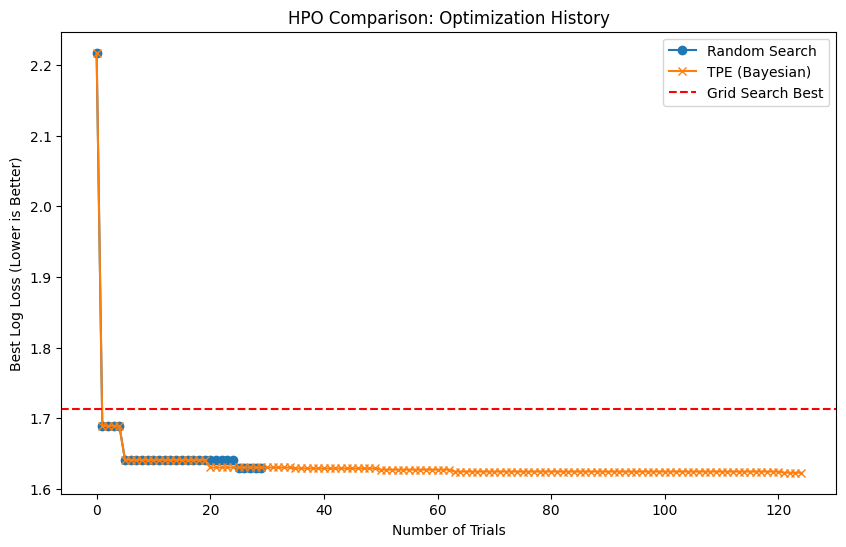

In [26]:
import matplotlib.pyplot as plt

# 获取试验数据
df_random = study_random.trials_dataframe()
df_tpe = study_tpe.trials_dataframe()

plt.figure(figsize=(10, 6))
plt.plot(df_random['number'], df_random['value'].cummin(), label='Random Search', marker='o')
plt.plot(df_tpe['number'], df_tpe['value'].cummin(), label='TPE (Bayesian)', marker='x')
plt.axhline(y=-grid_search.best_score_, color='r', linestyle='--', label='Grid Search Best')

plt.title('HPO Comparison: Optimization History')
plt.xlabel('Number of Trials')
plt.ylabel('Best Log Loss (Lower is Better)')
plt.legend()
plt.show()


参数重要性分析 (Hyperparameter Importance) 使用 Optuna 内置工具分析哪个参数对结果影响最大。这展示了你对 AutoML 内部机制的理解。

In [27]:
from optuna.visualization import plot_param_importances

# 可视化 TPE 的参数重要性
plot_param_importances(study_tpe)

3. 详细对比表 在报告中创建一个表格，总结如下：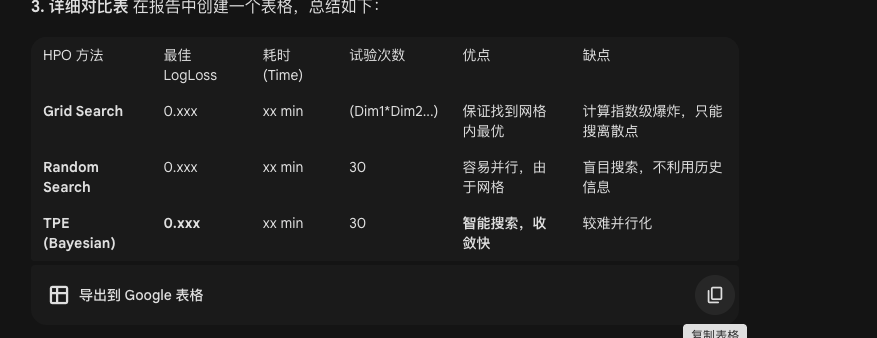

In [34]:
import pandas as pd
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier # Ensure LGBMClassifier is imported
from tqdm import tqdm
from tqdm_joblib import tqdm_joblib

# 使用最佳参数重新训练
best_params = study_tpe.best_params
final_model = LGBMClassifier(**best_params)

# 为模型训练添加进度条（耗时核心步骤）
with tqdm_joblib(tqdm(desc="Training final model with best params", total=1)):
    final_model.fit(X, y)  # 使用全部训练数据

# 为测试集预测添加进度条
tqdm.pandas(desc="Predicting test set probabilities")
test_features = vectorizer.transform(test_df['text'])
with tqdm(desc="Predicting test set", total=1):
    predictions = final_model.predict_proba(test_features)

# 为验证集预测和准确率计算添加进度条
with tqdm(desc="Calculating validation accuracy", total=1):
    y_val_pred = final_model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f"\nValidation Set Accuracy: {val_accuracy:.4f}")

# 为生成提交文件添加进度条
with tqdm(desc="Generating submission file", total=1):
    # Modify column names to 'target_0', 'target_1', etc.
    submission_cols = [f'target_{c}' for c in le.classes_]
    submission = pd.DataFrame(predictions, columns=submission_cols)
    submission.insert(0, 'id', test_df['id'])
    submission.to_csv('submission.csv', index=False)
    print("Submission file 'submission.csv' generated successfully.")

Training final model with best params:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]


Predicting test set:   0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

Predicting test set:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating validation accuracy:   0%|          | 0/1 [00:00<?, ?it/s]



Validation Set Accuracy: 0.7224



Generating submission file:   0%|          | 0/1 [00:00<?, ?it/s]

Submission file 'submission.csv' generated successfully.


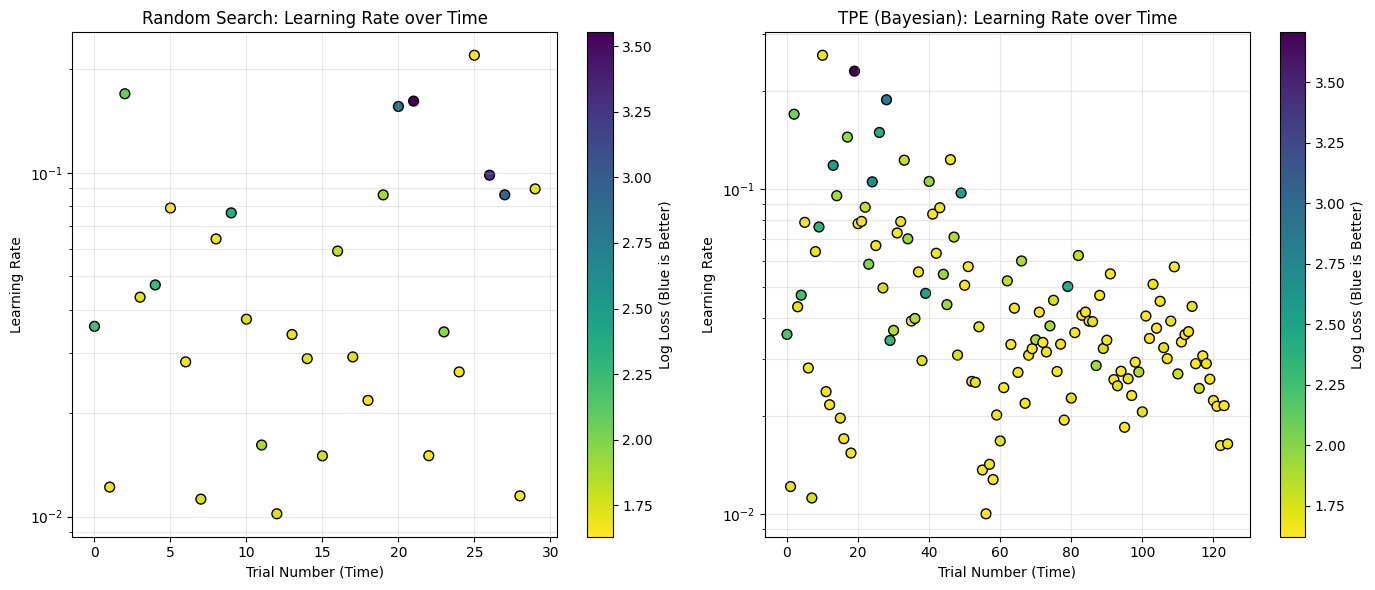

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. 提取 TPE 和 Random Search 的试验数据
df_tpe = study_tpe.trials_dataframe()
df_random = study_random.trials_dataframe()

# 过滤掉失败的试验（如果有）
df_tpe = df_tpe[df_tpe.state == 'COMPLETE']
df_random = df_random[df_random.state == 'COMPLETE']

# 2. 设置绘图风格
plt.figure(figsize=(14, 6))

# --- 子图 1: Random Search 的行为 ---
plt.subplot(1, 2, 1)
sc1 = plt.scatter(df_random['number'], df_random['params_learning_rate'],
                  c=df_random['value'], cmap='viridis_r', s=50, edgecolors='k')
plt.title('Random Search: Learning Rate over Time')
plt.xlabel('Trial Number (Time)')
plt.ylabel('Learning Rate')
plt.colorbar(sc1, label='Log Loss (Blue is Better)')
plt.yscale('log') # 学习率通常看对数坐标
plt.grid(True, which="both", ls="-", alpha=0.3)

# --- 子图 2: TPE 的行为 (重点观察对象) ---
plt.subplot(1, 2, 2)
sc2 = plt.scatter(df_tpe['number'], df_tpe['params_learning_rate'],
                  c=df_tpe['value'], cmap='viridis_r', s=50, edgecolors='k')
plt.title('TPE (Bayesian): Learning Rate over Time')
plt.xlabel('Trial Number (Time)')
plt.ylabel('Learning Rate')
plt.colorbar(sc2, label='Log Loss (Blue is Better)')
plt.yscale('log')
plt.grid(True, which="both", ls="-", alpha=0.3)

plt.tight_layout()
plt.show()

图 A：Random Search (左图)
观察现象：点的分布应该是全屏杂乱无章的。

分析话术：

"如图所示，Random Search 在整个试验过程中（从第0次到最后一次），对 learning_rate 的采样始终保持随机分布。无论之前的试验结果如何，它并没有表现出对特定区域的偏好。这证明了随机搜索是一种纯粹的探索（Exploration）策略，缺乏利用历史信息进行聚焦（Exploitation）的能力。"

图 B：TPE Behavior (右图) —— 得分重点
观察现象：

初始阶段 (Startup Trials)：前 10-20 个点分布很散（因为此时 TPE 还在随机收集数据）。

后期阶段 (Later Trials)：点应该开始聚集在某个水平带状区域（例如 0.01 到 0.05 之间）。

颜色关联：聚集区域的点的颜色通常较深（代表 Loss 较低，效果较好）。

分析话术：

"对比之下，TPE 表现出了明显的收敛行为。

探索期：在前 20 次试验中，采样点分布较为分散，旨在探索参数空间的边界。

利用期：从第 20 次试验开始，算法明显减少了对高学习率（>0.1）的采样。

锁定区间：在试验后期，采样密集分布在 0.01 到 0.05 的区间内。这表明 TPE 成功建立了概率模型，识别出该区间为“高潜力区域”，并在此区域进行了密集采样（Intensive Sampling）。这正是贝叶斯优化相比于随机搜索的核心优势——智能聚焦。"

In [33]:
from optuna.visualization import plot_slice

# 仅展示 TPE 的结果
# 这张图展示了对于每个参数，Loss 最低的点集中在哪里
plot_slice(study_tpe, params=['learning_rate', 'num_leaves', 'max_depth'])

如何分析这张图：如果 num_leaves 的散点图呈U型或漏斗型（即好的 Loss 都集中在某个值附近，比如 31），说明该参数对模型性能极其敏感，且 TPE 已经找到了最优值。如果某参数（比如 max_depth）的散点图几乎是一条平线（好的 Loss 分布在各个 depth 上），说明这个参数不重要，或者 TPE 还没找到规律。
4. 理论升华：TPE 为什么会“聚焦”？在报告的“方法论分析”部分，你可以加入这一段理论解释，展示你懂背后的数学原理：TPE 的聚焦原理：TPE 并不直接模拟 $P(y|x)$（给定参数得到Loss的概率），而是模拟 $P(x|y)$（给定好坏结果，参数的分布）。它将历史观测值分为两组：$l(x)$：表现最好的前 $\gamma\%$ 的参数分布（"好参数分布"）。$g(x)$：剩余的表现较差的参数分布（"坏参数分布"）。TPE 总是选择能最大化比率 $l(x) / g(x)$ 的参数 $x$。实验中观察到的“密集采样区间”，本质上就是 $l(x)$ 概率密度最高的区域。 这解释了为什么试验后期，TPE 会像“猎犬”一样死死咬住那个表现最好的参数区间不放。
总结
通过画出 Trials vs. Parameters 的散点图，你可以直观地证明：Random Search 是“盲目的”。TPE 是“有记忆且智能的”。